### Mie Theory

### Mie theory coefficients and Bessell functions (JJF)

There are 4 types of coefficients for the Mie theory expansion for the electric field in the vicinity of a spherical particle: $a_n$ and $b_n$ for the scattered fields (external to the particle), and $c_n$ and $d_n$ for the fields inside the particle (internal fields).  These coefficients can be expressed as follows:
\begin{equation}
a_n = \frac{m^2 j_n(mx)[x j_n(x)]' - \mu_1 j_n(x) [mxj_n (mx)]'}{m^2 j_n(mx)[x h_n^{(1)}(x)]' - \mu_1 h_n^{(1)}(x) [mxj_n (mx)]'} \\
\end{equation}

\begin{equation}
b_n = \frac{\mu_1 j_n(mx)[x j_n(x)]' - j_n(x) [mxj_n (mx)]'}
{\mu_1 j_n(mx)[x h_n^{(1)}(x)]' -  h_n^{(1)}(x) [mxj_n (mx)]'}  \\
\end{equation}

\begin{equation}
c_n = \frac{\mu_1 j_n(mx)[x h_n^{(1)}(x)]' - \mu_1 h_n^{(1)}(x) [xj_n (mx)]'}{\mu_1 j_n(mx)[x h_n^{(1)}(x)]' - h_n^{(1)}(x) [mxj_n (mx)]'} \\
\end{equation}

\begin{equation}
d_n = \frac{\mu_1 m j_n(mx)[x h_n^{(1)}(x)]' - \mu_1 m h_n^{(1)}(x) [mxj_n (mx)]'}
{m^2 j_n(mx)[x h_n^{(1)}(x)]' - \mu_1 h_n^{(1)}(x) [mxj_n (mx)]'} \\
\end{equation}.

In the above, $m = n_{sphere}/n_{medium}$ represents the refractive index of the spherical particle divided by the refractive index of the surrounding, $x = 2\pi r/\lambda$ is the size parameter of the sphere, where $r$ is the radius of the sphere and $\lambda$ is the wavelength of light, and $\mu_1 = \mu_{sphere}/\mu_{medium}$ represents the magnetic permiability of the spherical particle divided by the permeability of the medium.  The functions $j_n(z)$ and $h_n^{(1)}(z) = j_n(z) + iy_n(z)$ are the spherical Bessel functions.  The spherical Bessel functions are defined in terms of the Bessel functions of the first kind
\begin{equation}
j_n(z) = \sqrt{\frac{\pi}{2z}} J_{n+0.5}(z)
\end{equation}
and second kind
\begin{equation}
y_n(z) = \sqrt{\frac{\pi}{2z}} Y_{n+0.5}(z).
\end{equation}
The derivative terms are defined as
\begin{equation}
[z j_n(z)]' = zj_{n-1}(z) - nj_n(z)
\end{equation}
and
\begin{equation}
[zh_n^{(1)}(z)]' = zh_{n-1}^{(1)}(z) - nh_{n}^{(1)}(z).
\end{equation}


Let's test the Bessel and Spherical Bessel functions using the relations here and the built-in functions in scipy.



In [ ]:
!pip install miepython
!pip install wptherml==1.11b0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for miepython: filename=miepython-1.3.2-cp36-none-any.whl size=9286 sha256=914625d33ab090fa89244c6f96f5f4c07c439b08102977298e108068c6851976
  Stored in directory: /root/.cache/pip/wheels/a5/3a/95/160d3a1d22f870df8ab1c2857c2e100c59bf719ea69b217fc2
Successfully built miepython
     |████████████████████████████████| 1.1MB 7.3MB/s 


In [ ]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt

### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {
        'Material_List': ['Air', 'Al', 'Air'],
        'Thickness_List': [0, 20e-9,  0],
        'Lambda_List': [100e-9, 800e-9, 200]
        }

### create the instance called coated_au_film
au = multilayer(structure)
n_au = au.layer_ri(1)


  Gradient will be taken with respect to all layers! 
 Temperature not specified!
 Proceeding with default T = 300 K


In [2]:
### import functions from scipy
from scipy.special import spherical_jn
from scipy.special import spherical_yn
from scipy.special import jv
from scipy.special import yv
import numpy as np
#import miepython
from matplotlib import pyplot as plt

### define size parameter
# radius = 10 nm
r = 10e-9
# wavelength = 500 nm
lam = 500e-9

# ri of sphere
ns = 1.5
# ri of medium
nm = 1.0
# mu of sphere
mus = 1.0
# mu of surrounding
mum = 1.0

### parameters
m = ns/nm 
mu = mus/mum
x = 2*np.pi*r/lam

Let's define the Spherical Bessel functions and also the derivative terms here!

In [3]:

def s_jn(n,z):
  ''' Compute the spherical bessel function from the Bessel function
      of the first kind
  '''
  ns = n+0.5
  return np.sqrt(np.pi/(2*z)) * jv(ns, z)

def s_yn(n,z):
  ''' Compute the spherical bessel function from the Bessel function
      of the second kind
  '''
  ns = n+0.5
  return np.sqrt(np.pi/(2*z)) * yv(ns, z)

def s_hn(n, z):
  ''' Compute the spherical bessel function h_n^{(1)} '''
  ci = 0+1j
  return spherical_jn(n, z) + ci*spherical_yn(n, z)

def z_jn_prime(n,z):
  ''' Compute derivative of z*j_n(z) using recurrence relations '''
  return z*spherical_jn(n-1, z)-n*spherical_jn(n,z)

def z_hn_prime(n,z):
  ''' Compute derivative of z*h_n^{(1)}(z) using recurrence relations '''
  return z*s_hn(n-1,z) -n*s_hn(n,z)

def mie_coeff(n, m, mu, x):
  ''' computes the Mie theory a, b, c, and d coefficients for a
      given order n, relative refractive index m, relative permeability mu, and
      size parameter x.  Returns coefficients as an array. '''
  
  ### pre-compute the different Bessel function terms that will be used over and over again
  ## jnx <==> j_n(x)
  jnx = spherical_jn(n,x)
  ## jnmx <==> j_n(mx)
  jnmx = spherical_jn(n,m*x)
  ## hnx <==> h_n^{(1)}(x)
  hnx = s_hn(n, x)
  ## xjnxp <==> [x*j_n(x)]'
  xjnxp = z_jn_prime(n, x)
  ## mxjnmxp <==> [mx*j_n(mx)]'
  mxjnmxp = z_jn_prime(n, m*x)
  ## xhnxp <==> [x*h_n^{(1)}(x)]'
  xhnxp = z_hn_prime(n, x)

  ### now use pre-computed values to compute coefficients!
  ## a_n first
  a_num = m**2 * jnmx * xjnxp - mu * jnx * mxjnmxp 
  a_den = m**2 * jnmx * xhnxp - mu * hnx * mxjnmxp
  a_n = a_num / a_den

  ## b_n second
  b_num = mu * jnmx * xjnxp - jnx * mxjnmxp 
  b_den = mu * jnmx * xhnxp - hnx * mxjnmxp
  b_n = b_num / b_den

  ## c_n third
  c_num = mu * jnx * xhnxp - mu * hnx * xjnxp
  c_den = mu * jnmx * xhnxp - hnx * mxjnmxp
  c_n = c_num / c_den

  ## d_n fourth
  d_num = mu * m * jnx * xhnxp - mu * m * hnx * xjnxp 
  d_den = m**2 * jnmx * xhnxp - mu * hnx * mxjnmxp
  d_n = d_num / d_den
  return [a_n, b_n, c_n, d_n]

In [13]:

### define size parameter
# radius = 10 nm
r = 10e-9
# wavelength = 500 nm
lam = 500e-9

# ri of sphere
ns = 1.5+0.1*1j
# ri of medium
nm = 1.0
# mu of sphere
mus = 1.0
# mu of surrounding
mum = 1.0

### parameters
m = ns/nm 
mu = mus/mum
x = 2*np.pi*r/lam

c_1 = mie_coeff(1, ns, mus, x)
c_2 = mie_coeff(2, ns, mus, x)
c_3 = mie_coeff(3, ns, mus, x)
c_4 = mie_coeff(4, ns, mus, x)
c_ft = np.array([c_1[0], c_2[0], c_3[0], c_4[0]])
print(c_ft)

n_a = np.array([1,2, 3, 4])
c = mie_coeff(n_a, ns, mus, x)
print(c[0])

[6.63314448e-05-3.91686175e-04j 5.56088760e-08-3.50253968e-07j
 2.27799205e-11-1.47073896e-10j 5.40966554e-15-3.53973599e-14j]
[6.63314448e-05-3.91686175e-04j 5.56088760e-08-3.50253968e-07j
 2.27799205e-11-1.47073896e-10j 5.40966554e-15-3.53973599e-14j]


### Mie efficiencies and cross sections (AL)

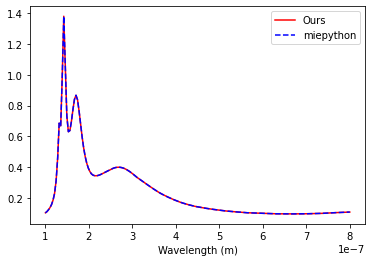

test


In [ ]:

### Functions for Mie theory efficiencies and cross sections goes here!
def q_scattering(m, lam, r):
    ''' computes the mie theory scattering effeciency (q_sca) using n_max and
    the function mie_coeff(c) to acquire an and bn, and size parameter x''' 
    x = 2 * np.pi * r/lam
    # n_max needs to be defined
    n_max_raw = x + 4*x**(1/3) + 2
    n_max = int(n_max_raw)
    # q_sca needs to be initialized
    q_sca = 0
    # hard-code magnetic permeability to be 1
    mu  = 1+0j
    for n in range(1,n_max):
        ### mie_coeff function returns an array of 
        ### mie coefficients for a given order n, relative refractive index m,
        ### relative permeability mu, and size parameter x
        c = mie_coeff(n, m, mu, x)
        ### a_n is the 0th element of c
        an = c[0]
        ### b)n is the 1st element of c
        bn = c[1]
        
        q_sca = q_sca + 2/x**2 * (2*n + 1) * (np.abs(an)**2 + np.abs(bn)**2)
        
    return q_sca

def q_extinction(m, lam, r):
    ''' computes mie theory extinction theory (q_ext) using n_max and
    the function mie_coeff (c) to acquire an and bn, and size parameter x'''
    x = 2 * np.pi * r/lam
    n_max_raw = x + 4*x**(1/3) + 2
    n_max = int(n_max_raw)
    # initialize q_extinction
    q_ext = 0
    # hard-code magnetic permeability to be 1
    mu = 1+0j
    for n in range(1, n_max):
        c = mie_coeff(n, m, mu, x)
        an = c[0]
        bn = c[1]
        
        q_ext = q_ext + 2/x**2 * (2*n+1) * np.real(an + bn)
    return q_ext


ext_list = np.zeros_like(au.lambda_array)
scat_list = np.zeros_like(au.lambda_array)
abs_list = np.zeros_like(au.lambda_array)

mp_qext = np.zeros_like(au.lambda_array)
mp_qscat = np.zeros_like(au.lambda_array)
mp_qabs = np.zeros_like(au.lambda_array)

r = 40e-9

for i in range(0,len(au.lambda_array)):
  x = 2*np.pi * r / au.lambda_array[i]

  scat_list[i] = q_scattering(n_au[i], au.lambda_array[i], r)
  ext_list[i] = q_extinction(n_au[i], au.lambda_array[i], r)
  abs_list[i] = ext_list[i] - scat_list[i]
  qext, qsca, qback, g = miepython.mie(np.conj(n_au[i]),x)
  mp_qscat[i] = qsca
  mp_qext[i] = qext 
  mp_qabs[i] = qext - qsca


plt.plot(au.lambda_array, abs_list, 'red', label='Ours' )
plt.plot(au.lambda_array, mp_qabs, 'b--', label='miepython')
plt.xlabel('Wavelength (m)')
plt.legend()
plt.show()

print('test')



### Scattered and Far Field Equations (JB)

In [ ]:
### Functions for Scattered and Far Field computations go here!

In [ ]:
### functions for Pi_sub_n and Tau_sub_n
def pi_n(n, theta):
  '''Provides pi_n functions from n = 0 to n = 4'''
  for i in theta:
    pi_2 = 3*np.cos(theta)
    pi_3 = (2*3-1)/(3-1) * np.cos(theta) * 3*np.cos(theta) - (3)/(3-1)* 1
    pi_4 = (2*4-1)/(4-1)* pi_3 - (3)/(3-1)*3*np.cos(theta)
  
  if n == 0:   
    return 0 
  elif n == 1:
    return 1
  elif n == 2: 
    return pi_2
  elif n == 3:
    return pi_3
  elif n == 4:
    return pi_4
  return print("Pick 'n' as an integer 1-4")


def tau_n(n, theta):
  for i in theta:
    tau_1 = np.cos(theta)
    tau_2 = 3*np.cos(2*theta)
    tau_3 = 3*np.cos(theta) - (3+1)* tau_2
    tau_4 = 4*np.cos(theta) - (4+1)* tau_3
  if n == 0:
    return 0
  elif n == 1:
    return tau_1
  elif n == 2:
    return tau_2
  elif n == 3:
    return tau_3
  elif n == 4 :
    return tau_4

  return print("Pick 'n' as an integer 1-4" )


In [ ]:
### This is the block of code is for the S1 and S2 functions
## for complex refractive index m=m'+im",   
## size parameter x=k0*a, and u=cos(scattering angle),  
## where k0=vacuum wave number, a=sphere radius;


an = (a_n * n2)
bn = (b_n * n2)
k0 = 500e-9 #nm
a = 10e-9

x = k0 * a 

nmax = round((2+x+4*x^(1/3)))

p_n = pi_n(1,)
t_n = tau_n(1,)


n = (1,nmax)
n2=(2*n+1)/(n(n+1))

Pi_n = n2 * p_n
Tau_n = n2 * t_n

def S_1(an,bn,pi_n,tau_n):
  S1 = ((an*Pi_n) +(bn*Tau_n))
  return S1 

def S_2(an,bn,pi_n,tau_n):
  S2 = ((an * Tau_n) + (bn * Pi_n))
  return S2 



NameError: ignored

In [ ]:
### This block of Code will pertain to the final Es Coordinate system
i = 
k = 
r = 10e-9

def Es_theta(i,k,r,S2,theta):
  Es_0 = (((e**(i*r*k))/(-i*k*r))* cos(theta))
  return Es_0

def Es_pho(i,k,r,S1,theta):
  Es_p = (((e**(i*r*k))/(i*k*r))* sin(theta))



### Internal field and computation of the absorption efficiency (JFV)



$$E_1 = \sum_{n=1}^{\infty}\frac{(2n+1)}{(n(n+1)}(c_nM_{oln}^{(1)} - d_nN_{oln}^{(1)})$$



In [ ]:
### Functions for internal field and absorption efficiency go here!
### m is refractive index
### x = ka where a is radius denoted as r
### k = 2pi/lam
###J_n(z) is a bessel function

import numpy as np

def pi_n(n, theta):
  '''Provides pi_n functions from n = 0 to n = 4'''
  for i in theta:
    pi_2 = 3*np.cos(theta)
    pi_3 = (2*3-1)/(3-1) * np.cos(theta) * 3*np.cos(theta) - (3)/(3-1)* 1
    pi_4 = (2*4-1)/(4-1)* pi_3 - (3)/(3-1)*3*np.cos(theta)
  
  if n == 0:   
    return 0 
  elif n == 1:
    return 1
  elif n == 2: 
    return pi_2
  elif n == 3:
    return pi_3
  elif n == 4:
    return pi_4
  return print("Pick 'n' as an integer 1-4")


def tau_n(n, theta):
  for i in theta:
    tau_1 = np.cos(theta)
    tau_2 = 3*np.cos(2*theta)
    tau_3 = 3*np.cos(theta) - (3+1)* tau_2
    tau_4 = 4*np.cos(theta) - (4+1)* tau_3
  if n == 0:
    return 0
  elif n == 1:
    return tau_1
  elif n == 2:
    return tau_2
  elif n == 3:
    return tau_3
  elif n == 4 :
    return tau_4

  return print("Pick 'n' as an integer 1-4" )

def n_max(x):
  return np.round(x+4*x**(1/3)+2)




def build_M(n, theta, phi,r, m, lam):
  k = 2*pi/lam
  x = k*r

  M = np.array([[0],
       [np.cos(phi)*pi_n(n, theta)*np.cos(theta)*s_jn(n,z)],
       [-1*np.sin(phi)*tau_n(n, Theta)*np.cos(theta)*s_jn(n,z)]])
  return M


def build_N(n, theta, phi,r, m, lam):
  k = 2*pi/lam
  x = k*r

  N=[[n*n+1*np.cos(phi)*np.sin(theta)*pi_n(n, theta)*np.cos(theta)*(s_jn(n,z)/r*m*x)]
     [np.cos(theta)* tau_n(n, theta)*np.cos(theta)*(r*m*x*s_jn(n,z)/r*m*x)]
     [-1*np.sin(phi)*pi_n*np.cos(theta)*(r*m*x*s_jn(n,z)/r*m*x)]]

  return N 

def internal_field(n, m, mu, x, theta, phi,r):
  '''calculates internal field of a sphere.
  '''
  mc_1 = mie_coeff(n, m, mu, x)
  c_1 = mc_1[2]
  d_1 = mc_1[3]

  #build_M(n, theta, phi,r, m, lam, pi_n, tau_n)
  M =Build_M(n, theta, phi,r, m, lam)
  #build_N(n, theta, phi,r, m, lam, pi_n, tau_n)
  N =Build_N(n, theta, phi,r, m, lam)

  for i in lam:
    a = (2*n+1)/n*(n+1)
    int_field = a * (c_1 * M[i]) * ( d_1 * N[i])

  return int_field

def Q_abs(n,z,x, m , mu, eps_imaginary):
  n_max = n_max(x)
  #x_prime is also equal to r*k 
  x_prime = z/m
  m_n = 2*n*(2*n+1)
  n_n = 2*n *(2*n+1) * ((2*n+1)*np.abs(s_jn(n,z)/z)**2 * np.abs(z_jn_prime(n,z)/z)**2)


  mc_1 = mie_coeff(n, m, mu, x)
  c_1 = mc_1[2]
  d_1 = mc_1[3]
  som = 0
  for n in range(1, n_max):
    multiply = m_n[n] * c_1 + n_n * d_1
    som = multiply + som
    as_electric_field = 1/4*som
  
  coeff = 4 * eps_imaginary / x**2

  Q_abs =  coeff * np.trapz(as_electric_field, x=None, dx=.001)
  return Q_abs





